In [1]:
!pip install tensorflow==2.4.1 mediapipe

  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=b6ac1618c5d0441e2c78a0a69268bdd84e5907bbab5669125d434e86b5133508
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=5e3aa99d626006f298dff89cdc1ba8879b3ad03ed3cb824ff370611767cac108
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built wrapt termcolor
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 2.0.0
    Uninstalling importlib-metadata-2.0.0:
      Successfully uninstalled importlib-

In [1]:
#importing the libraries
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import mediapipe as mp

In [37]:
DATA_PATH = os.path.join('Hand Flapping Classifier Dataset') 
actions = np.array(['Autistic','Non-Autistic'])
no_sequences = 30
sequence_length = 30
start_folder = 30

In [38]:
#storing the actions
for action in actions: 
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

# Preprocess data and lable features

In [39]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [40]:
#optimising and labelling the data
label_map = {label:num for num, label in enumerate(actions)}
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
np.array(sequences).shape
np.array(labels).shape

(60,)

In [41]:
label_map

{'Autistic': 0, 'Non-Autistic': 1}

In [42]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
y_test.shape

(3, 2)

# Build and Train LSTM Neural Network

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [56]:
#The cnn model using LSTM
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [57]:
#model compiler
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
#Model training
res = [.7, 0.2, 0.1]
actions[np.argmax(res)]

history=model.fit(X_train, y_train, epochs=2000)

Epoch 1/2000
2/2 [==============================] - 5s 119ms/step - loss: 8.1529 - accuracy: 0.5605
Epoch 2/2000
2/2 [==============================] - 0s 119ms/step - loss: 3.4929 - accuracy: 0.5956
Epoch 3/2000
2/2 [==============================] - 0s 121ms/step - loss: 3.5714 - accuracy: 0.4616
Epoch 4/2000
2/2 [==============================] - 0s 124ms/step - loss: 10.7855 - accuracy: 0.4863
Epoch 5/2000
2/2 [==============================] - 0s 143ms/step - loss: 7.8805 - accuracy: 0.5735
Epoch 6/2000
2/2 [==============================] - 0s 129ms/step - loss: 8.8235 - accuracy: 0.5058
Epoch 7/2000
2/2 [==============================] - 0s 124ms/step - loss: 11.1975 - accuracy: 0.5150
Epoch 8/2000
2/2 [==============================] - 0s 128ms/step - loss: 9.6437 - accuracy: 0.5371
Epoch 9/2000
2/2 [==============================] - 0s 122ms/step - loss: 9.0593 - accuracy: 0.4525
Epoch 10/2000
2/2 [==============================] - 0s 122ms/step - loss: 25.9746 - accuracy: 0.5

2/2 [==============================] - 0s 117ms/step - loss: 0.5277 - accuracy: 0.7880
Epoch 162/2000
2/2 [==============================] - 0s 119ms/step - loss: 0.4801 - accuracy: 0.8322
Epoch 163/2000
2/2 [==============================] - 0s 114ms/step - loss: 0.4522 - accuracy: 0.8427
Epoch 164/2000
2/2 [==============================] - 0s 114ms/step - loss: 0.4405 - accuracy: 0.8193
Epoch 165/2000
2/2 [==============================] - 0s 113ms/step - loss: 0.5995 - accuracy: 0.7725
Epoch 166/2000
2/2 [==============================] - 0s 116ms/step - loss: 0.6821 - accuracy: 0.6866
Epoch 167/2000
2/2 [==============================] - 0s 120ms/step - loss: 0.4202 - accuracy: 0.8310
Epoch 168/2000
2/2 [==============================] - 0s 114ms/step - loss: 0.6046 - accuracy: 0.7321
Epoch 169/2000
2/2 [==============================] - 0s 113ms/step - loss: 0.5493 - accuracy: 0.7763
Epoch 170/2000
2/2 [==============================] - 0s 113ms/step - loss: 0.6235 - accuracy: 0.

2/2 [==============================] - 0s 115ms/step - loss: 0.4308 - accuracy: 0.8101
Epoch 322/2000
2/2 [==============================] - 0s 108ms/step - loss: 0.5358 - accuracy: 0.7880
Epoch 323/2000
2/2 [==============================] - 0s 111ms/step - loss: 0.4601 - accuracy: 0.8310
Epoch 324/2000
2/2 [==============================] - 0s 112ms/step - loss: 0.4464 - accuracy: 0.7504
Epoch 325/2000
2/2 [==============================] - 0s 117ms/step - loss: 0.4502 - accuracy: 0.8310
Epoch 326/2000
2/2 [==============================] - 0s 117ms/step - loss: 0.2860 - accuracy: 0.8869
Epoch 327/2000
2/2 [==============================] - 0s 112ms/step - loss: 0.5531 - accuracy: 0.7399
Epoch 328/2000
2/2 [==============================] - 0s 112ms/step - loss: 0.5773 - accuracy: 0.7374
Epoch 329/2000
2/2 [==============================] - 0s 115ms/step - loss: 0.4622 - accuracy: 0.7763
Epoch 330/2000
2/2 [==============================] - 0s 118ms/step - loss: 0.5540 - accuracy: 0.

2/2 [==============================] - 0s 122ms/step - loss: 0.6190 - accuracy: 0.7529
Epoch 482/2000
2/2 [==============================] - 0s 115ms/step - loss: 0.5381 - accuracy: 0.7699
Epoch 483/2000
2/2 [==============================] - 0s 111ms/step - loss: 0.3596 - accuracy: 0.8856
Epoch 484/2000
2/2 [==============================] - 0s 111ms/step - loss: 0.5781 - accuracy: 0.7542
Epoch 485/2000
2/2 [==============================] - 0s 112ms/step - loss: 0.8551 - accuracy: 0.7452
Epoch 486/2000
2/2 [==============================] - 0s 113ms/step - loss: 0.6861 - accuracy: 0.7399
Epoch 487/2000
2/2 [==============================] - 0s 110ms/step - loss: 0.9852 - accuracy: 0.7217
Epoch 488/2000
2/2 [==============================] - 0s 113ms/step - loss: 0.8706 - accuracy: 0.6553
Epoch 489/2000
2/2 [==============================] - 0s 111ms/step - loss: 0.4468 - accuracy: 0.8765
Epoch 490/2000
2/2 [==============================] - 0s 115ms/step - loss: 0.5881 - accuracy: 0.

2/2 [==============================] - 0s 121ms/step - loss: 0.4291 - accuracy: 0.8401
Epoch 642/2000
2/2 [==============================] - 0s 121ms/step - loss: 0.2878 - accuracy: 0.9077
Epoch 643/2000
2/2 [==============================] - 0s 119ms/step - loss: 0.3956 - accuracy: 0.8869
Epoch 644/2000
2/2 [==============================] - 0s 114ms/step - loss: 0.3719 - accuracy: 0.8531
Epoch 645/2000
2/2 [==============================] - 0s 115ms/step - loss: 0.3092 - accuracy: 0.8973
Epoch 646/2000
2/2 [==============================] - 0s 120ms/step - loss: 0.3694 - accuracy: 0.8556
Epoch 647/2000
2/2 [==============================] - 0s 114ms/step - loss: 0.3238 - accuracy: 0.8752
Epoch 648/2000
2/2 [==============================] - 0s 110ms/step - loss: 0.3578 - accuracy: 0.8869
Epoch 649/2000
2/2 [==============================] - 0s 113ms/step - loss: 0.3078 - accuracy: 0.8882
Epoch 650/2000
2/2 [==============================] - 0s 110ms/step - loss: 0.3526 - accuracy: 0.

2/2 [==============================] - 0s 115ms/step - loss: 0.2735 - accuracy: 0.8765
Epoch 802/2000
2/2 [==============================] - 0s 120ms/step - loss: 0.3020 - accuracy: 0.8660
Epoch 803/2000
2/2 [==============================] - 0s 116ms/step - loss: 0.3396 - accuracy: 0.8310
Epoch 804/2000
2/2 [==============================] - 0s 120ms/step - loss: 0.2923 - accuracy: 0.8660
Epoch 805/2000
2/2 [==============================] - 0s 112ms/step - loss: 0.3201 - accuracy: 0.8180
Epoch 806/2000
2/2 [==============================] - 0s 122ms/step - loss: 0.2723 - accuracy: 0.8882
Epoch 807/2000
2/2 [==============================] - 0s 116ms/step - loss: 0.3135 - accuracy: 0.8869
Epoch 808/2000
2/2 [==============================] - 0s 124ms/step - loss: 0.2818 - accuracy: 0.8414
Epoch 809/2000
2/2 [==============================] - 0s 116ms/step - loss: 0.2543 - accuracy: 0.8986
Epoch 810/2000
2/2 [==============================] - 0s 118ms/step - loss: 0.3472 - accuracy: 0.

2/2 [==============================] - 0s 121ms/step - loss: 0.3556 - accuracy: 0.8660
Epoch 962/2000
2/2 [==============================] - 0s 126ms/step - loss: 0.3548 - accuracy: 0.9103
Epoch 963/2000
2/2 [==============================] - 0s 126ms/step - loss: 0.3593 - accuracy: 0.8322
Epoch 964/2000
2/2 [==============================] - 0s 124ms/step - loss: 0.2773 - accuracy: 0.8960
Epoch 965/2000
2/2 [==============================] - 0s 120ms/step - loss: 0.3591 - accuracy: 0.8869
Epoch 966/2000
2/2 [==============================] - 0s 145ms/step - loss: 0.3924 - accuracy: 0.8543
Epoch 967/2000
2/2 [==============================] - 0s 164ms/step - loss: 0.3342 - accuracy: 0.8414
Epoch 968/2000
2/2 [==============================] - 0s 118ms/step - loss: 0.4841 - accuracy: 0.7659
Epoch 969/2000
2/2 [==============================] - 0s 128ms/step - loss: 0.7177 - accuracy: 0.8076
Epoch 970/2000
2/2 [==============================] - 0s 125ms/step - loss: 0.7668 - accuracy: 0.

2/2 [==============================] - 0s 120ms/step - loss: 0.6601 - accuracy: 0.7621
Epoch 1042/2000
2/2 [==============================] - 0s 117ms/step - loss: 0.4732 - accuracy: 0.7867
Epoch 1043/2000
2/2 [==============================] - 0s 112ms/step - loss: 0.8566 - accuracy: 0.7646
Epoch 1044/2000
2/2 [==============================] - 0s 116ms/step - loss: 0.5759 - accuracy: 0.7425
Epoch 1045/2000
2/2 [==============================] - 0s 114ms/step - loss: 0.4837 - accuracy: 0.8088
Epoch 1046/2000
2/2 [==============================] - 0s 116ms/step - loss: 0.4274 - accuracy: 0.7880
Epoch 1047/2000
2/2 [==============================] - 0s 113ms/step - loss: 0.7377 - accuracy: 0.6983
Epoch 1048/2000
2/2 [==============================] - 0s 116ms/step - loss: 0.4435 - accuracy: 0.8076
Epoch 1049/2000
2/2 [==============================] - 0s 103ms/step - loss: 0.5350 - accuracy: 0.8076
Epoch 1050/2000
2/2 [==============================] - 0s 112ms/step - loss: 0.5735 - acc

2/2 [==============================] - 0s 114ms/step - loss: 0.5903 - accuracy: 0.7984
Epoch 1200/2000
2/2 [==============================] - 0s 114ms/step - loss: 0.6200 - accuracy: 0.8193
Epoch 1201/2000
2/2 [==============================] - 0s 118ms/step - loss: 0.6258 - accuracy: 0.7438
Epoch 1202/2000
2/2 [==============================] - 0s 119ms/step - loss: 0.6092 - accuracy: 0.8088
Epoch 1203/2000
2/2 [==============================] - 0s 115ms/step - loss: 0.4809 - accuracy: 0.8622
Epoch 1204/2000
2/2 [==============================] - 0s 114ms/step - loss: 0.4218 - accuracy: 0.8622
Epoch 1205/2000
2/2 [==============================] - 0s 112ms/step - loss: 0.5203 - accuracy: 0.7166
Epoch 1206/2000
2/2 [==============================] - 0s 115ms/step - loss: 0.4262 - accuracy: 0.8882
Epoch 1207/2000
2/2 [==============================] - 0s 128ms/step - loss: 0.4989 - accuracy: 0.8660
Epoch 1208/2000
2/2 [==============================] - 0s 115ms/step - loss: 0.4260 - acc

2/2 [==============================] - 0s 112ms/step - loss: 0.4420 - accuracy: 0.8101
Epoch 1358/2000
2/2 [==============================] - 0s 125ms/step - loss: 0.3216 - accuracy: 0.8556
Epoch 1359/2000
2/2 [==============================] - 0s 115ms/step - loss: 0.2776 - accuracy: 0.8543
Epoch 1360/2000
2/2 [==============================] - 0s 113ms/step - loss: 0.2276 - accuracy: 0.8869
Epoch 1361/2000
2/2 [==============================] - 0s 120ms/step - loss: 0.3399 - accuracy: 0.8660
Epoch 1362/2000
2/2 [==============================] - 0s 125ms/step - loss: 0.3087 - accuracy: 0.8543
Epoch 1363/2000
2/2 [==============================] - 0s 120ms/step - loss: 0.3228 - accuracy: 0.8660
Epoch 1364/2000
2/2 [==============================] - 0s 128ms/step - loss: 0.4350 - accuracy: 0.7842
Epoch 1365/2000
2/2 [==============================] - 0s 118ms/step - loss: 0.4589 - accuracy: 0.8531
Epoch 1366/2000
2/2 [==============================] - 0s 119ms/step - loss: 0.4260 - acc

2/2 [==============================] - 0s 115ms/step - loss: 0.2585 - accuracy: 0.8882
Epoch 1516/2000
2/2 [==============================] - 0s 116ms/step - loss: 0.2422 - accuracy: 0.8869
Epoch 1517/2000
2/2 [==============================] - 0s 115ms/step - loss: 0.2861 - accuracy: 0.8999
Epoch 1518/2000
2/2 [==============================] - 0s 127ms/step - loss: 0.2803 - accuracy: 0.8777
Epoch 1519/2000
2/2 [==============================] - 0s 118ms/step - loss: 0.2606 - accuracy: 0.8973
Epoch 1520/2000
2/2 [==============================] - 0s 115ms/step - loss: 0.2331 - accuracy: 0.8986
Epoch 1521/2000
2/2 [==============================] - 0s 114ms/step - loss: 0.2552 - accuracy: 0.8648
Epoch 1522/2000
2/2 [==============================] - 0s 117ms/step - loss: 0.2741 - accuracy: 0.8765
Epoch 1523/2000
2/2 [==============================] - 0s 118ms/step - loss: 0.2899 - accuracy: 0.8765
Epoch 1524/2000
2/2 [==============================] - 0s 117ms/step - loss: 0.2285 - acc

2/2 [==============================] - 0s 113ms/step - loss: 0.2108 - accuracy: 0.8999
Epoch 1674/2000
2/2 [==============================] - 0s 112ms/step - loss: 0.2138 - accuracy: 0.9207
Epoch 1675/2000
2/2 [==============================] - 0s 107ms/step - loss: 0.2081 - accuracy: 0.8765
Epoch 1676/2000
2/2 [==============================] - 0s 114ms/step - loss: 0.2530 - accuracy: 0.9090
Epoch 1677/2000
2/2 [==============================] - 0s 115ms/step - loss: 0.2718 - accuracy: 0.8648
Epoch 1678/2000
2/2 [==============================] - 0s 111ms/step - loss: 0.2648 - accuracy: 0.9207
Epoch 1679/2000
2/2 [==============================] - 0s 114ms/step - loss: 0.2191 - accuracy: 0.8869
Epoch 1680/2000
2/2 [==============================] - 0s 110ms/step - loss: 0.2679 - accuracy: 0.8752
Epoch 1681/2000
2/2 [==============================] - 0s 113ms/step - loss: 0.3296 - accuracy: 0.8543
Epoch 1682/2000
2/2 [==============================] - 0s 116ms/step - loss: 0.2469 - acc

2/2 [==============================] - 0s 110ms/step - loss: 0.2995 - accuracy: 0.8882
Epoch 1832/2000
2/2 [==============================] - 0s 116ms/step - loss: 0.2995 - accuracy: 0.8660
Epoch 1833/2000
2/2 [==============================] - 0s 110ms/step - loss: 0.3658 - accuracy: 0.8856
Epoch 1834/2000
2/2 [==============================] - 0s 111ms/step - loss: 0.4706 - accuracy: 0.7712
Epoch 1835/2000
2/2 [==============================] - 0s 111ms/step - loss: 0.3994 - accuracy: 0.8297
Epoch 1836/2000
2/2 [==============================] - 0s 113ms/step - loss: 0.4375 - accuracy: 0.8986
Epoch 1837/2000
2/2 [==============================] - 0s 111ms/step - loss: 0.6482 - accuracy: 0.7308
Epoch 1838/2000
2/2 [==============================] - 0s 110ms/step - loss: 0.5111 - accuracy: 0.7971
Epoch 1839/2000
2/2 [==============================] - 0s 113ms/step - loss: 1.1590 - accuracy: 0.7997
Epoch 1840/2000
2/2 [==============================] - 0s 113ms/step - loss: 0.5676 - acc

2/2 [==============================] - 0s 119ms/step - loss: 0.1987 - accuracy: 0.9090
Epoch 1990/2000
2/2 [==============================] - 0s 108ms/step - loss: 0.1846 - accuracy: 0.8986
Epoch 1991/2000
2/2 [==============================] - 0s 106ms/step - loss: 0.2051 - accuracy: 0.8882
Epoch 1992/2000
2/2 [==============================] - 0s 102ms/step - loss: 0.1756 - accuracy: 0.9103
Epoch 1993/2000
2/2 [==============================] - 0s 105ms/step - loss: 0.1649 - accuracy: 0.9311
Epoch 1994/2000
2/2 [==============================] - 0s 106ms/step - loss: 0.1648 - accuracy: 0.8973
Epoch 1995/2000
2/2 [==============================] - 0s 102ms/step - loss: 0.1792 - accuracy: 0.9103
Epoch 1996/2000
2/2 [==============================] - 0s 121ms/step - loss: 0.1747 - accuracy: 0.9090
Epoch 1997/2000
2/2 [==============================] - 0s 116ms/step - loss: 0.1776 - accuracy: 0.9207
Epoch 1998/2000
2/2 [==============================] - 0s 113ms/step - loss: 0.1993 - acc

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
Total params: 596,642
Trainable params: 596,642
Non-trainable params: 0
________________________________________________

# Accuracy and Precision

In [48]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [49]:
import matplotlib.pyplot as plt

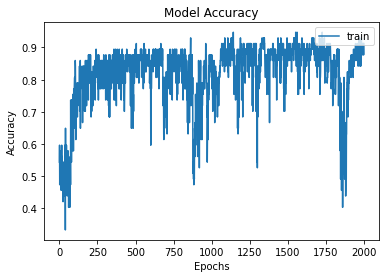

In [50]:
# plotting the graphs
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train'], loc='upper right')
plt.show()

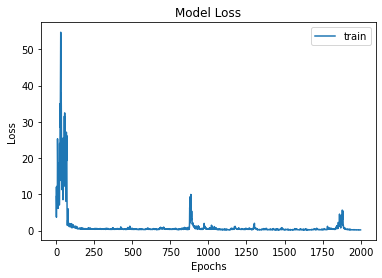

In [51]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train'], loc='upper right')
plt.show()

# Make Predictions

In [52]:
res = model.predict(X_test)
actions[np.argmax(res[1])]

'Autistic'

In [53]:
np.sum(res[0])

1.0

# Save weights

In [54]:
# save the model 
model.save('action.h5')

In [55]:
del model

In [58]:
# to load the weights, initialize the model again from the above cell where the cnn model with LSTM is defined, 
#compile it and then run this cell
model.load_weights('action.h5')

# Evaluation of model using confusion matrix and accuracy score

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [60]:
yhat = model.predict(X_train)

In [61]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [62]:
cfmatrix=confusion_matrix(ytrue, yhat)

In [63]:
print(cfmatrix)

[[26  2]
 [ 2 27]]


In [64]:
accuracy_score(ytrue, yhat)

0.9298245614035088

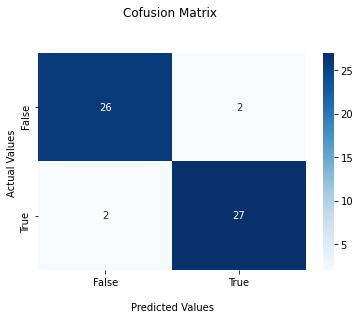

In [65]:
import seaborn as sns

ax = sns.heatmap(cfmatrix, annot=True, cmap='Blues')

ax.set_title('Cofusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Test in real time

In [66]:
# making the output frame
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [67]:
plt.figure(figsize=(18,18))
#plt.imshow(prob_viz(res, actions, image, colors))

<Figure size 1296x1296 with 0 Axes>

<Figure size 1296x1296 with 0 Axes>

In [68]:
# Predicting and plotting the output images

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti